# Problem Statement

## Given a salary dataset with yrs of experience and the corresponding salaries, use an ML model to predict new salary of people based on some different yrs of experience.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv("./data/Salary_Data.csv")

In [3]:
X = ds["YearsExperience"].values
Y = ds["Salary"].values

In [4]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [5]:
Y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

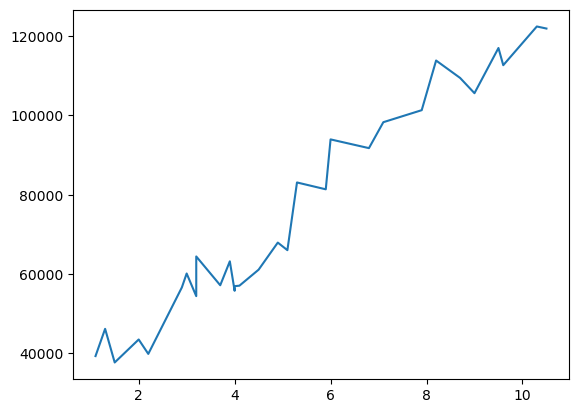

In [6]:
plt.plot(X,Y)

In [7]:
# normalizing the dataset for better rate of convergence
# also, mostly we use numpy arrays:

X = np.array(X)
Y = np.array(Y)

In [8]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [9]:
# let's normalize : x_new = (x_old - mean)/sd
# where sd = sqrt of variance

In [10]:
def mean(X):
    return np.sum(X)/len(X)

In [11]:
def variance(X):
    mean_val = mean(X)
    return (np.sum((X - mean_val)**2)/len(X))

In [12]:
def norm(X):
    mu = mean(X)
    var = variance(X)
    return (X - mu)/np.sqrt(var)

In [13]:
X_norm = norm(X)

In [14]:
X_norm

array([-1.51005294, -1.43837321, -1.36669348, -1.18749416, -1.11581443,
       -0.86493538, -0.82909552, -0.75741579, -0.75741579, -0.57821647,
       -0.50653674, -0.47069688, -0.47069688, -0.43485702, -0.29149756,
       -0.1481381 , -0.07645838, -0.00477865,  0.21026054,  0.2461004 ,
        0.53281931,  0.6403389 ,  0.92705781,  1.03457741,  1.21377673,
        1.32129632,  1.50049564,  1.5363355 ,  1.78721455,  1.85889428])

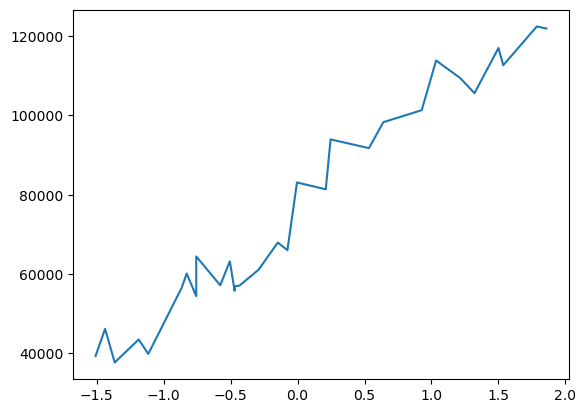

In [15]:
plt.plot(X_norm, Y)

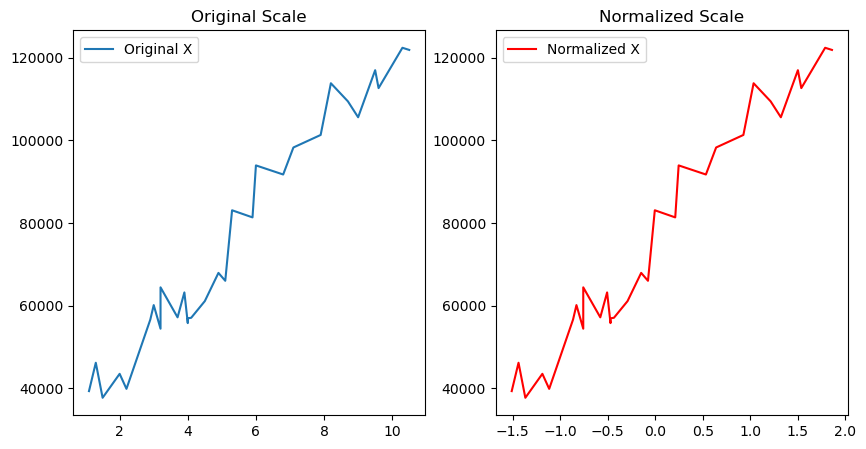

In [16]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(X, Y, label="Original X")
plt.title("Original Scale")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(X_norm, Y, label="Normalized X", color="red")
plt.title("Normalized Scale")
plt.legend()

plt.show()


In [17]:
# other way of directly calculating
# xnorm = (X - ds["YearsExperience"].mean()) / ds["YearsExperience"].std()
# xnorm """

In [18]:
import random

In [19]:
class SimpleLR:
    def __init__(self, learning_rate= 0.1, max_iter= 2000, threshold= 1e-6):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.threshold = threshold
        # for wt and bias, we will use random.uniform

        self.weight = random.uniform(-1,1)
        self.bias = random.uniform(-1,1)

    # now, fit fn that maintains a loss history and tells how the dataset
    # fits the model, also providing the loss history alongside
    # takes in X, Y, and fits the model with X and Y
    def fit(self, X, Y):
        n = len(X)
        loss_history = []
        iter = 0
        least_difference = []
        y_pred = (self.weight)* X + self.bias
        errors = Y - y_pred
        prev_loss = (1/(2*n))*(np.sum((errors)**2))
        loss_history.append(prev_loss)
        for i in range(self.max_iter):
            iter += 1
            w_grad = (1/n) * np.sum(errors * X)
            b_grad = (1/n) * np.sum(errors)

            self.weight += self.learning_rate * w_grad
            self.bias += self.learning_rate * b_grad
            y_pred = (self.weight)* X + self.bias
            errors = Y - y_pred
            curr_loss = (1/(2*n))*(np.sum((errors)**2))
            if(np.abs(curr_loss - prev_loss) < self.threshold):
                least_difference.append(curr_loss - prev_loss)
                break
            else:
                least_difference.append(curr_loss - prev_loss)
                prev_loss = curr_loss
                loss_history.append(prev_loss)
        return loss_history, least_difference, iter
    def letsplot(self, X, Y):
        y_pred = (self.weight)* X + self.bias
        plt.plot(X,Y)
        plt.plot(X, y_pred)


In [20]:
model = SimpleLR()

In [21]:
loss_history, least_difference, iter = model.fit(X_norm, Y)

In [22]:
loss_history

[3251486411.348377,
 2636674733.6058025,
 2138677274.634316,
 1735299332.867413,
 1408563200.0362213,
 1143906932.4429557,
 929535355.6924108,
 755894378.5244696,
 615245187.018437,
 501319341.8985505,
 409039407.3514427,
 334292660.3682853,
 273747795.3119276,
 224706454.61627817,
 184982968.652802,
 152806945.0223863,
 126744365.88174962,
 105633676.77783382,
 88534018.6036621,
 74683295.48258305,
 63464209.754508995,
 54376750.314769,
 47015908.16857958,
 41053626.03016618,
 36224177.498051316,
 32312324.187038258,
 29143723.00511766,
 26577156.047762025,
 24498236.812303916,
 22814312.231582876,
 21450333.321198843,
 20345510.403787762,
 19450603.84068477,
 18725729.524571355,
 18138581.328519486,
 17662991.289717477,
 17277763.358287826,
 16965728.733829834,
 16712980.688018857,
 16508254.770911954,
 16342426.778055381,
 16208106.103841554,
 16099306.357728349,
 16011178.563376646,
 15939795.049951779,
 15881974.40407764,
 15835139.680919575,
 15797203.55516156,
 15766475.29329755

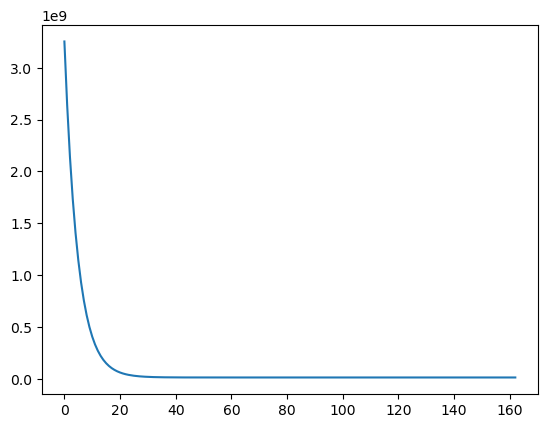

In [23]:
plt.plot(loss_history)

In [24]:
least_difference

[-614811677.7425747,
 -497997458.97148657,
 -403377941.7669029,
 -326736132.8311918,
 -264656267.59326553,
 -214371576.7505449,
 -173640977.1679412,
 -140649191.5060326,
 -113925845.11988652,
 -92279934.54710782,
 -74746746.9831574,
 -60544865.05635768,
 -49041340.695649445,
 -39723485.96347618,
 -32176023.630415678,
 -26062579.140636697,
 -21110689.103915796,
 -17099658.174171716,
 -13850723.121079057,
 -11219085.728074051,
 -9087459.439739995,
 -7360842.146189421,
 -5962282.138413399,
 -4829448.532114863,
 -3911853.311013058,
 -3168601.181920599,
 -2566566.9573556334,
 -2078919.2354581095,
 -1683924.5807210393,
 -1363978.9103840329,
 -1104822.9174110815,
 -894906.5631029904,
 -724874.3161134161,
 -587148.1960518695,
 -475590.0388020091,
 -385227.93142965063,
 -312034.6244579926,
 -252748.045810977,
 -204725.91710690223,
 -165827.9928565733,
 -134320.67421382666,
 -108799.74611320533,
 -88127.79435170256,
 -71383.51342486776,
 -57820.64587413892,
 -46834.72315806523,
 -37936.125758014

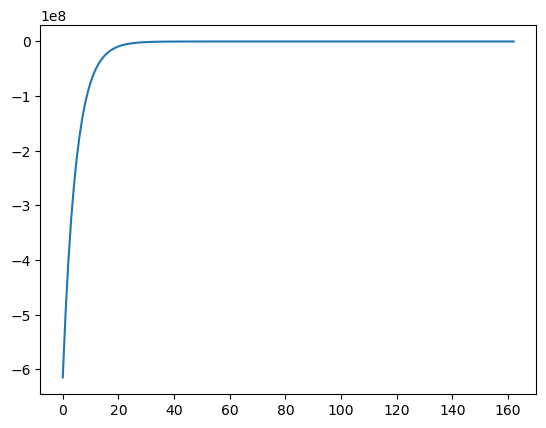

In [25]:
plt.plot(least_difference)

In [26]:
iter

163

In [27]:
# thus instead of max iteration value of 2000, it ran only 163 times
# as it meets the threshold value

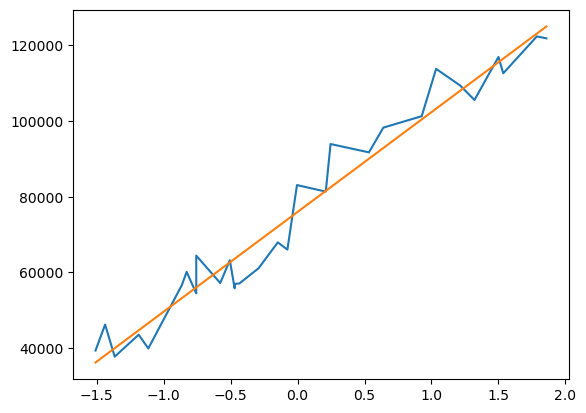

In [30]:
# this will give wrong answer :- model.letsplot(X,Y) 

model.letsplot(X_norm, Y)